This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Census_income.csv')
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Their are no missing values in the dataset.

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Their are 8 columns of Object data type, 6 columns of int64 datatype and 1 column of Int34 data type.

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
df['Workclass'].isnull().sum()

0

In [9]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [10]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [11]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [12]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [13]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Above, we check all the unique values present in different columns.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Above is the statistical summary of the dataset in which some columns are not there as they of object data types.

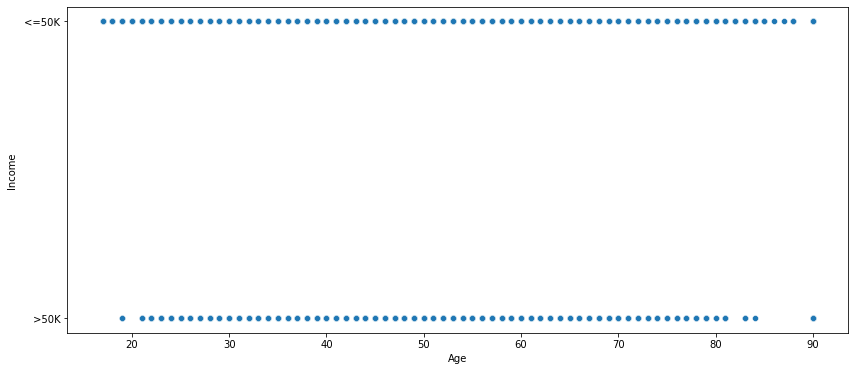

In [16]:
plt.figure(figsize=[14,6])
sns.scatterplot(df['Age'],df['Income'])
plt.show()

Data is near about equally distributed for Age column.

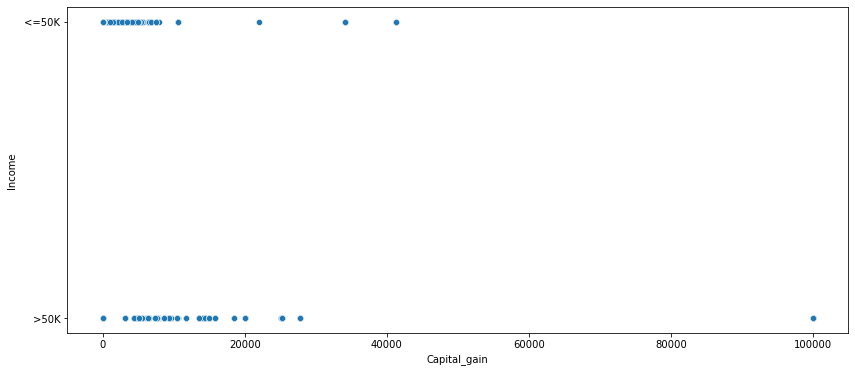

In [17]:
plt.figure(figsize=[14,6])
sns.scatterplot(df['Capital_gain'],df['Income'])
plt.show()

Data is not equally distibuted.

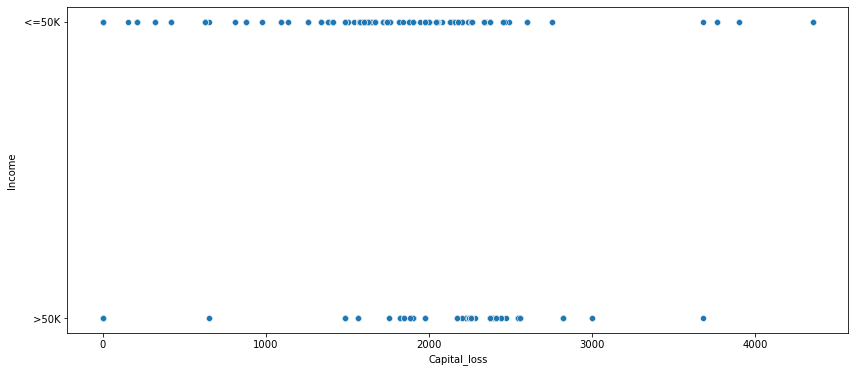

In [18]:
plt.figure(figsize=[14,6])
sns.scatterplot(df['Capital_loss'],df['Income'])
plt.show()

In some of the ranges of 'Capital_loss' data is equaaly distibuted and in some ranges data is not distributed equally.

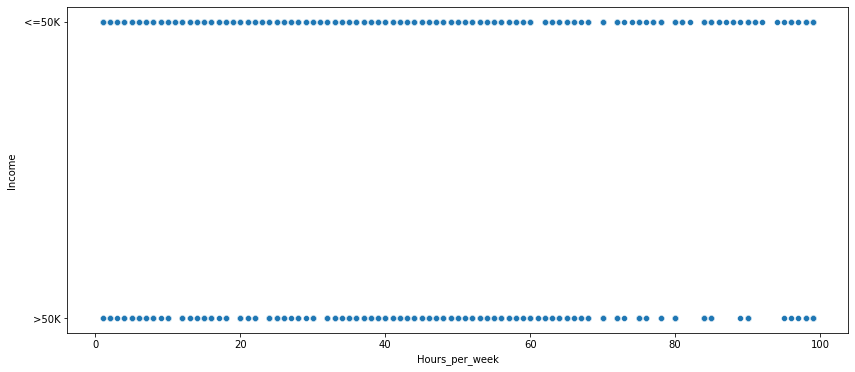

In [19]:
plt.figure(figsize=[14,6])
sns.scatterplot(df['Hours_per_week'],df['Income'])
plt.show()

In some of the ranges of 'Hours_per_week' data is equally distibuted and in some ranges data is not distributed equally.

<AxesSubplot:xlabel='Income', ylabel='count'>

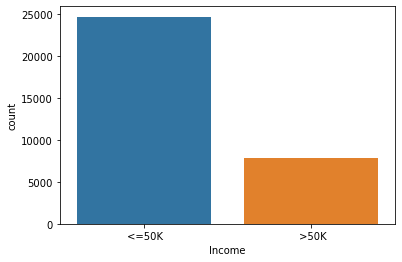

In [20]:
sns.countplot(df['Income'])

In [21]:
df['Income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object

class imbalance is there, we will resolve this query in further solution.

<AxesSubplot:xlabel='Sex', ylabel='count'>

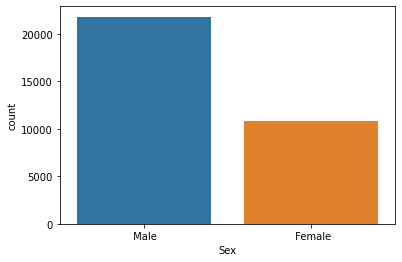

In [22]:
sns.countplot(df['Sex'])

Male count is more as compare to female category.

<AxesSubplot:xlabel='Race', ylabel='count'>

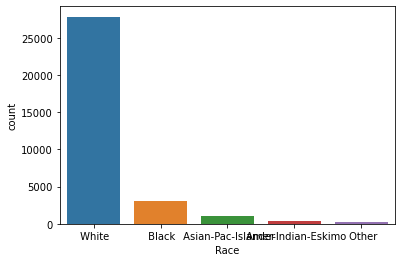

In [23]:
sns.countplot(df['Race'])

Majority is of White in Race column.

<AxesSubplot:xlabel='Income', ylabel='count'>

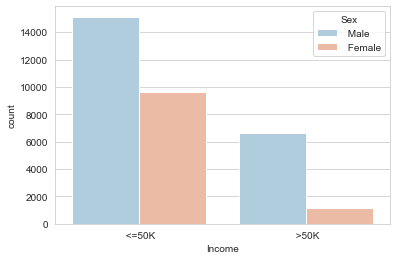

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Sex',data=df,palette='RdBu_r')

Count of male is high for both the categories (>50k and <50K).

<AxesSubplot:xlabel='Income', ylabel='count'>

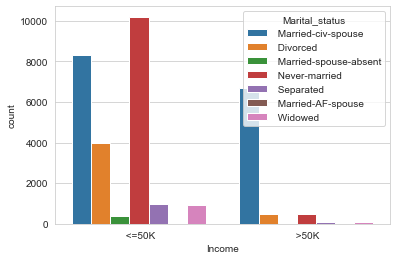

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Marital_status',data=df)

'Never Married' count is more for not earning 50k and Married-civ-spouse count is more who earns more than 50k.

<AxesSubplot:xlabel='Income', ylabel='count'>

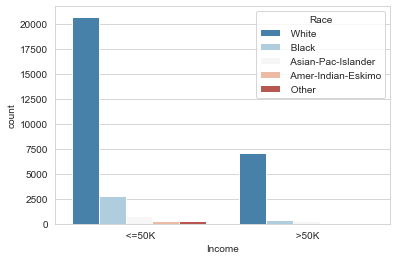

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Race',data=df,palette='RdBu_r')

it is very clear, as in the dataset, no. of white people is more, their count is more in both the cases.

<AxesSubplot:xlabel='Income', ylabel='count'>

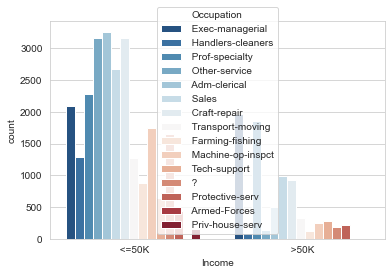

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Occupation',data=df,palette='RdBu_r')

More number of count who earns more than 50k - Exec-managerial


More number of count who earns less than 50k - Adm-clerical

<AxesSubplot:xlabel='Income', ylabel='count'>

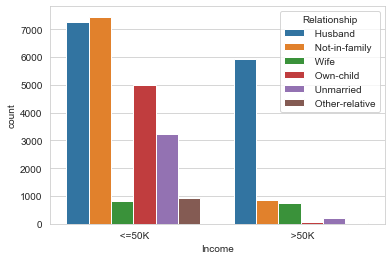

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Relationship',data=df)

More number of count who earns more than 50k - Husband

More number of count who earns less than 50k - Not-in-family(no in any relation)

<AxesSubplot:xlabel='Income', ylabel='count'>

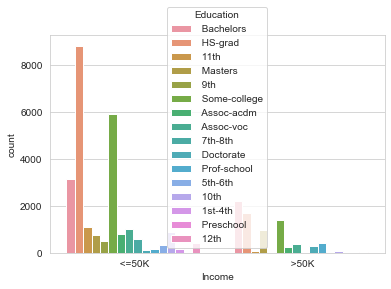

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Education',data=df)

bachelors earn more i.e >50k.

So we can drop Education columns as is is the string representation of column Education num.

In [30]:
df.drop('Education',axis=1,inplace=True)

In [31]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='Income', ylabel='count'>

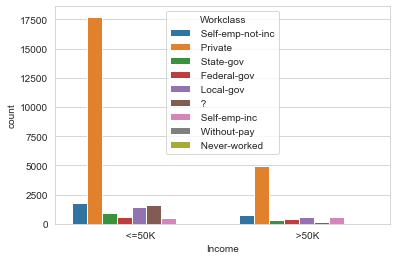

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Income',hue='Workclass',data=df)

More number of private working employees are there in dataset who earns more than as well as less than 50k.

In [33]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [34]:
List=['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country']

In [35]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [36]:
df['Workclass']=Le.fit_transform(df['Workclass'])

In [37]:
df['Marital_status']=Le.fit_transform(df['Marital_status'])

In [38]:
df['Occupation']=Le.fit_transform(df['Occupation'])

In [39]:
df['Relationship']=Le.fit_transform(df['Relationship'])

In [40]:
df['Race']=Le.fit_transform(df['Race'])

In [41]:
df['Sex']=Le.fit_transform(df['Sex'])

In [42]:
df['Native_country']=Le.fit_transform(df['Native_country'])

In [58]:
df['Income']=Le.fit_transform(df['Income'])

In [59]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0


In [60]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Now all the data is converted into int data type, we can proceed further.

In [61]:
 df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


Above is the statistical summary of the dataset, which tells us about, mean, median, std for each column.

Lets check for outliers.

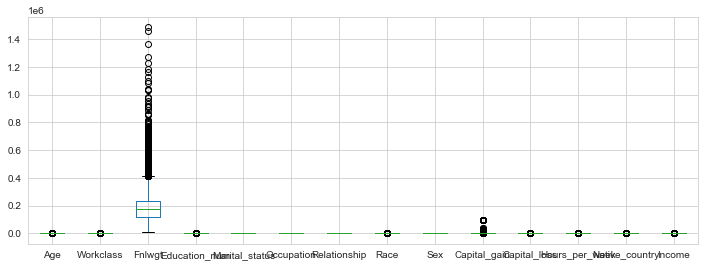

In [62]:
df.boxplot(figsize=[12,5])
plt.subplots_adjust(bottom=0.25)
plt.show()

We are not getting clear insighnt of the outliers here, we will pot all the boxplot one by one.

<AxesSubplot:>

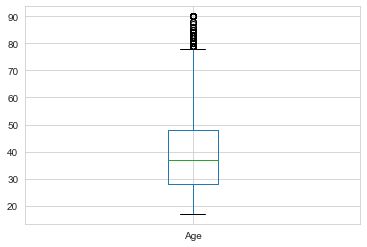

In [63]:
df['Age'].plot.box()

their are outliers in 'Age' column.

<AxesSubplot:>

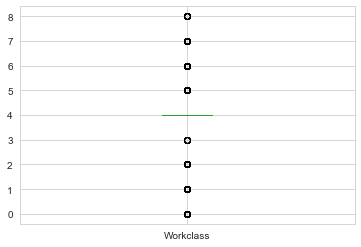

In [64]:
df['Workclass'].plot.box()

Outliers are their in 'Workclass' column.

<AxesSubplot:>

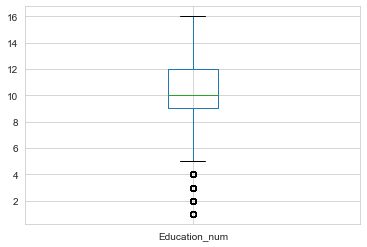

In [65]:
df['Education_num'].plot.box()

Outliers are their in the column.

<AxesSubplot:>

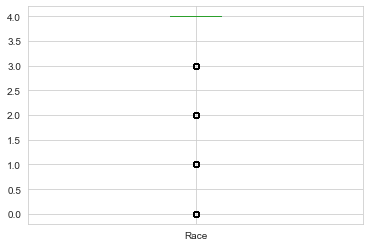

In [66]:
df['Race'].plot.box()

Outliers are there in 'Race' column.

In [67]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

<AxesSubplot:>

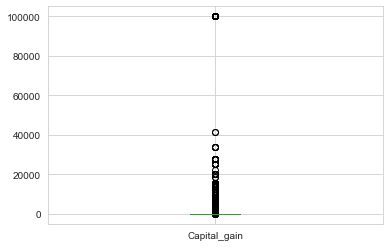

In [68]:
df['Capital_gain'].plot.box()

Outliers are there in column.

<AxesSubplot:>

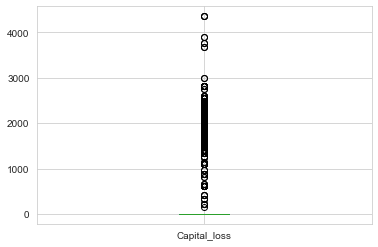

In [69]:
df['Capital_loss'].plot.box()

Multiple outliers are there in the column.

<AxesSubplot:>

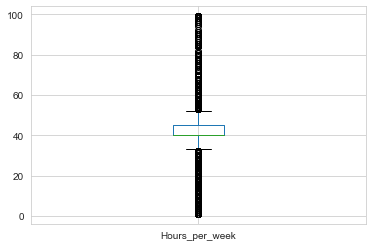

In [70]:
df['Hours_per_week'].plot.box()

Multiple outliers are there in the column.

In [71]:
#Correlation
dfcor=df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education_num,0.036527,0.052015,-0.043159,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


<AxesSubplot:>

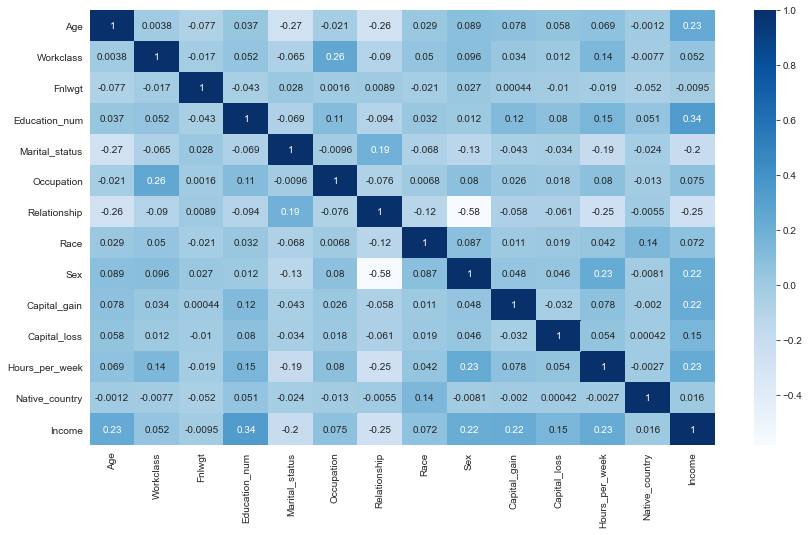

In [72]:
plt.figure(figsize=[14,8])
sns.heatmap(dfcor,cmap='Blues',annot=True)

Their is positive as well as negative correlation is there in dataset.

In [73]:
corr_matrix=df.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Educcation_num column has the highest correlation while Relationship has the lowest with the income column.

Outlier Removal :-

In [74]:
from scipy.stats import zscore

In [75]:
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))


(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [76]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


In [77]:
df.shape

(32560, 14)

In [78]:
df_new.shape

(27417, 14)

In [79]:
(27417/32560)*100

84.20454545454545

We cannot use zscore technique for outlier removal.

we will continue with dataset  df.

In [80]:
df.shape

(32560, 14)

lets check the distribution of the data .

In [81]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

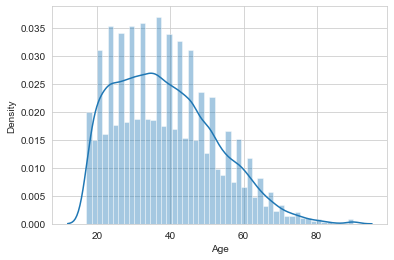

In [82]:
sns.distplot(df['Age'])

we will not consider outliers here, as we got bell shaped curve.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

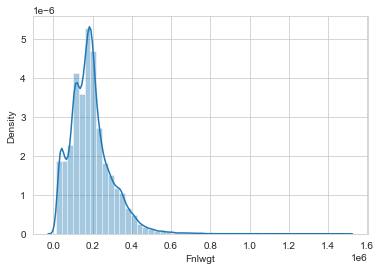

In [83]:
sns.distplot(df['Fnlwgt'])

Data is not normally distributed bur rightl skewed, we will use IQR technique.

In [84]:
df['Fnlwgt'].max()

1484705

In [85]:
#Lets compute IQR

IQR=df.Fnlwgt.quantile(0.75)-df.Fnlwgt.quantile(0.25)
IQR

119223.0

In [86]:
#Extreme outliers

lower_bridge=df['Fnlwgt'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fnlwgt'].quantile(0.75)+(IQR*3)

In [87]:
print(upper_bridge)
print(lower_bridge)

594723.5
-239837.5


In [88]:
df.loc[df['Fnlwgt']>=594724,'Fnlwgt']=594724

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

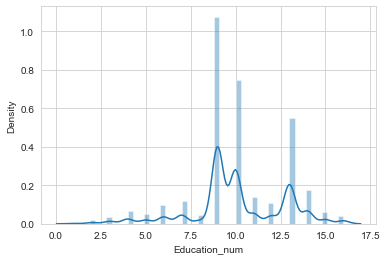

In [89]:
sns.distplot(df['Education_num'])

We are going to remove outliers here, as the outliers we found they are very near to whiskers.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

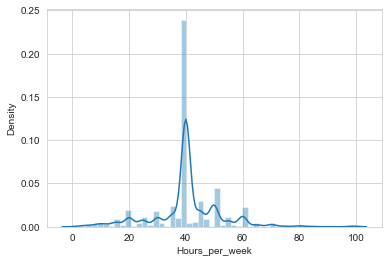

In [90]:
sns.distplot(df['Hours_per_week'])

In [91]:
df1=df.copy()

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

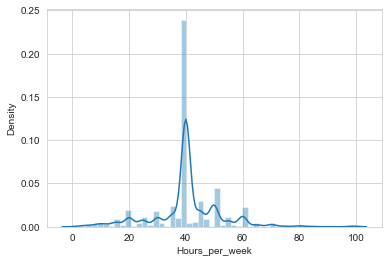

In [92]:
sns.distplot(df1['Hours_per_week'])

In [93]:
#Lets compute IQR

IQR=df1.Hours_per_week.quantile(0.75)-df1.Hours_per_week.quantile(0.25)
IQR

5.0

In [95]:
#Extreme outliers

lower_bridge=df1['Hours_per_week'].quantile(0.25)-(IQR*3)
upper_bridge=df1['Hours_per_week'].quantile(0.75)+(IQR*3)

In [96]:
print(upper_bridge)
print(lower_bridge)

60.0
25.0


In [97]:
df['Hours_per_week'].max()

99

In [98]:
df.loc[df['Hours_per_week']>=60,'Hours_per_week']=60

In [99]:
df1.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

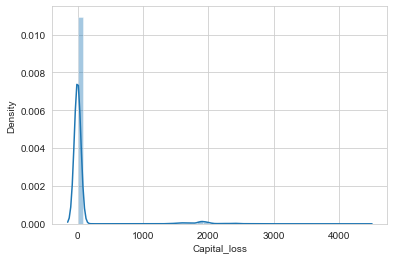

In [100]:
sns.distplot(df1['Capital_loss'])

In [102]:
#Lets compute IQR

IQR=df1.Capital_loss.quantile(0.75)-df1.Capital_loss.quantile(0.25)
IQR

0.0

We cannot rempve outliers from capital loss and capital gain column as the data will pay important role in finding accuracy.

#Spliting the datset into x and y

In [103]:
x=df1.drop('Income',axis=1)
y=df1['Income']

In [104]:
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,9,4,1,3,4,1,0,0,20,39


In [105]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [110]:
x.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             0.946947
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

In [111]:
from sklearn.preprocessing import power_transform

In [112]:
x_new=power_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)

In [113]:
x_new.skew()

Age              -0.013897
Workclass         0.061629
Fnlwgt           -0.007701
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.187152
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.725467
dtype: float64

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
mn=MinMaxScaler()

In [119]:
X=mn.fit_transform(x_new)
X

array([[0.61358554, 0.67466746, 0.28474777, ..., 0.        , 0.12226705,
        0.72616604],
       [0.44596256, 0.3926309 , 0.55177351, ..., 0.        , 0.39767864,
        0.72616604],
       [0.65020854, 0.3926309 , 0.58173913, ..., 0.        , 0.39767864,
        0.72616604],
       ...,
       [0.70759057, 0.3926309 , 0.43959905, ..., 0.        , 0.39767864,
        0.72616604],
       [0.13565086, 0.3926309 , 0.52859807, ..., 0.        , 0.19364445,
        0.72616604],
       [0.63819631, 0.52781926, 0.65896214, ..., 0.        , 0.39767864,
        0.72616604]])

skewness removed and data is scaled.

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [125]:
X_train.shape

(22792, 13)

In [126]:
y_test.shape

(9768,)

In [127]:
y_train.shape

(22792,)

In [128]:
y_test.shape

(9768,)

Class balancing

In [129]:
from imblearn.over_sampling import SMOTE

In [130]:
sm=SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X,y)


In [131]:
X_res.shape

(49438, 13)

In [132]:
 y_res.shape

(49438,)

In [133]:
from collections import Counter

In [134]:
print('original dataset shape{}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_res)))

original dataset shapeCounter({0: 24719, 1: 7841})
Resampled dataset shapeCounter({0: 24719, 1: 24719})


problem of class imbalace is solved, we can proceed.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [136]:
#finding the best random_state

maxAccu=0
maxRs=0
for i in range(1,200):
    X_res_train,X_res_test,y_res_train,y_res_test=train_test_split(X_res,y_res,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_res_train,y_res_train)
    pred=LR.predict(X_res_test)
    acc=accuracy_score(y_res_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        
print("Best accuracy is", maxAccu,"on Random state", maxRs)   

Best accuracy is 0.7857335490830637 on Random state 102


In [137]:
 X_res_train,X_res_test,y_res_train,y_res_test=train_test_split(X_res,y_res,test_size=.30,random_state=102)

In [148]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [139]:
dt=DecisionTreeClassifier()
dt.fit(X_res_train,y_res_train)
pred=dt.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))

0.8518743257820928
[[6419 1097]
 [1100 6216]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7516
           1       0.85      0.85      0.85      7316

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



In [140]:
LG=LogisticRegression()
LG.fit(X_res_train,y_res_train)
pred=LG.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))

0.7857335490830637
[[5814 1702]
 [1476 5840]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      7516
           1       0.77      0.80      0.79      7316

    accuracy                           0.79     14832
   macro avg       0.79      0.79      0.79     14832
weighted avg       0.79      0.79      0.79     14832



In [146]:
rf=RandomForestClassifier()
rf.fit(X_res_train,y_res_train)
pred=rf.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))

0.899878640776699
[[6690  826]
 [ 659 6657]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7516
           1       0.89      0.91      0.90      7316

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



In [149]:
mnb=MultinomialNB()
mnb.fit(X_res_train,y_res_train)
pred=mnb.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))

0.7533710895361381
[[5041 2475]
 [1183 6133]]
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      7516
           1       0.71      0.84      0.77      7316

    accuracy                           0.75     14832
   macro avg       0.76      0.75      0.75     14832
weighted avg       0.76      0.75      0.75     14832



We got different accuracies for different Models, it might me due to overfitting, lets do cross validation.

In [150]:
#DecisionTreeClassifier
scr=cross_val_score(dt,X_res,y_res,cv=5)
print(scr.mean())


0.8482557879769551


In [151]:
#LogisticRegression
scr=cross_val_score(LG,X_res,y_res,cv=5)
print(scr.mean())


0.7776812569413007


In [152]:
#RandomForestClassifier
scr=cross_val_score(rf,X_res,y_res,cv=5)
print(scr.mean())


0.8964371692192978


In [153]:
#MultinomialNB
scr=cross_val_score(mnb,X_res,y_res,cv=5)
print(scr.mean())


0.7482099217926322


As the difference is very less for RandomForestClassifier, we will select this model and proceed for Hyperparameter Tuning.

In [157]:
parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [158]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(X_res_train,y_res_train)
GCV_RF.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [159]:
RF_model=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=100)
RF_model.fit(X_res_train,y_res_train)
pred=RF_model.predict(X_res_test)
print(accuracy_score(y_res_test,pred))

0.8557847896440129


Model Saving

In [160]:
import joblib

In [161]:
joblib.dump(RF_model,'Census.pkl')

['Census.pkl']

Model Loading

In [162]:
Model=joblib.load('Census.pkl')